In [1]:
import requests
import pprint
import json

In [ ]:
import time
%matplotlib inline

# Выгрузка данных

Я загружал данные с API информационной платформы OPENDOTA

In [ ]:
import csv
num = 5578109011
for i in range(10):
    print(i)
    url = 'https://api.opendota.com/api/publicMatches?less_than_match_id=' + str(num)
    r = requests.get(url)
    num -= 100
    for j in range(100):
        #try:
         #   match = json.loads(r.text)[j]
        #except KeyError:
         #   time.sleep(10)
          #  break
        dat = [match]
    
        with open('PROJECT_DOTA_PUBLIC.csv', 'a', encoding="utf-8") as f:
            writer = csv.DictWriter(
                f, fieldnames=list(dat[0].keys()), quoting=csv.QUOTE_NONNUMERIC)
            for d in dat:
                writer.writerow(d)

# Предобработка загруженных данных

Объединим данные в один датафрейм

In [3]:
import pandas as pd
df_ = pd.read_csv('C:\\Users\\kostik\\PROJECT_DOTA_PUBLIC.csv', encoding='ISO-8859-1', error_bad_lines=False)
df_2 = pd.read_csv('C:\\Users\\kostik\\Downloads\\PROJECT_DOTA_PUBLIC_4.csv', encoding='ISO-8859-1', error_bad_lines=False)
df_3 = pd.read_csv('C:\\Users\\kostik\\Downloads\\PROJECT_DOTA_PUBLIC_5 (4).csv', encoding='ISO-8859-1', error_bad_lines=False)

In [36]:
import numpy as np

In [4]:
df_

,match_id,match_seq_num,radiant_win,start_time,duration,avg_mmr,num_mmr,lobby_type,game_mode,avg_rank_tier,num_rank_tier,cluster,radiant_team,dire_team
0,5578709011,4682979852,True,1598043607,564,1802.0,1.0,7,22,36,3,183,"44,14,11,75,35","5,54,56,28,84"
1,5578725017,4682994719,False,1598044669,581,NaN,NaN,0,22,48,4,153,"35,34,62,6,84","48,67,14,74,11"
2,5578724813,4683003326,True,1598044669,1240,2632.0,2.0,7,22,42,5,185,"5,90,22,10,56","36,18,86,112,23"
3,5578723414,4682998360,True,1598044570,775,3121.0,1.0,7,22,43,3,251,"9,8,49,68,94","58,54,104,64,44"
4,5578722900,4683003214,True,1598044529,1355,1805.0,1.0,7,22,24,3,131,"35,84,67,88,42","14,95,28,45,93"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917996,5578084505,4682454582,True,1598015586,2493,1090.0,1.0,7,22,34,5,182,"54,75,84,21,101","96,119,65,1,8"
1917997,5578084505,4682454582,True,1598015586,2493,1090.0,1.0,7,22,34,5,182,"54,75,84,21,101","96,119,65,1,8"
1917998,5578084505,4682454582,True,1598015586,2493,1090.0,1.0,7,22,34,5,182,"54,75,84,21,101","96,119,65,1,8"
1917999,5578084505,4682454582,True,1598015586,2493,1090.0,1.0,7,22,34,5,182,"54,75,84,21,101","96,119,65,1,8"


In [4]:
df_3.rename(columns={'5423461701': 'match_id', '4545669621': 'match_seq_num', 'True': 'radiant_win', 
                    '1589832748': 'start_time', '2983': 'duration', 'Unnamed: 5': 'avg_mmr',
                    'Unnamed: 6': 'num_mmr', '7': 'lobby_type', '22': 'game_mode',
                    '13': 'avg_rank_tier', '3': 'num_rank_tier', '153': 'cluster',
                    '31,21,6,4,114': 'radiant_team', '90,40,61,60,42': 'dire_team'}, inplace=True)

In [7]:
df_3

,match_id,match_seq_num,radiant_win,start_time,duration,avg_mmr,num_mmr,lobby_type,game_mode,avg_rank_tier,num_rank_tier,cluster,radiant_team,dire_team
0,5423461619,4545667077,True,1589832752,2676,3459.0,1.0,7,22,35,5,185,"9,17,106,5,57","120,45,22,64,44"
1,5423461617,4545661070,False,1589832738,2465,4184.0,2.0,7,22,48,8,131,"31,126,64,108,93","25,8,26,121,14"
2,5423461615,4545668116,True,1589832752,2905,3300.0,3.0,0,22,49,3,137,"50,89,31,43,34","21,74,81,2,86"
3,5423461612,4545660925,True,1589832749,2155,2571.0,2.0,7,22,25,8,193,"31,12,114,99,3","20,19,11,29,55"
4,5423461610,4545664872,False,1589832738,2723,4151.0,1.0,0,3,71,4,236,"11,44,31,27,51","30,22,129,96,32"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386848,5273470306,4425157261,True,1583268409,2281,3115.0,4.0,7,22,53,6,122,"14,41,26,63,17","31,86,53,4,108"
1386849,5273470304,4425164500,True,1583268416,2875,NaN,NaN,7,22,33,7,225,"88,7,111,46,8","89,84,9,29,34"
1386850,5273470300,4425161098,False,1583268421,2598,3144.0,1.0,7,22,38,4,187,"114,81,121,61,71","120,5,107,8,76"
1386851,5273470214,4425156761,False,1583268415,2297,NaN,NaN,7,22,27,7,187,"75,54,64,114,121","87,44,50,99,101"


In [5]:
df1 = df_.drop_duplicates()
df2 = df_2.drop_duplicates()
df3 = df_3.drop_duplicates()

In [6]:
df = pd.concat([df1, df2, df3])

In [7]:
df = df.reset_index()

In [8]:
df

,index,match_id,match_seq_num,radiant_win,start_time,duration,avg_mmr,num_mmr,lobby_type,game_mode,avg_rank_tier,num_rank_tier,cluster,radiant_team,dire_team
0,0,5578709011,4682979852,True,1598043607,564,1802.0,1.0,7,22,36,3,183,"44,14,11,75,35","5,54,56,28,84"
1,1,5578725017,4682994719,False,1598044669,581,NaN,NaN,0,22,48,4,153,"35,34,62,6,84","48,67,14,74,11"
2,2,5578724813,4683003326,True,1598044669,1240,2632.0,2.0,7,22,42,5,185,"5,90,22,10,56","36,18,86,112,23"
3,3,5578723414,4682998360,True,1598044570,775,3121.0,1.0,7,22,43,3,251,"9,8,49,68,94","58,54,104,64,44"
4,4,5578722900,4683003214,True,1598044529,1355,1805.0,1.0,7,22,24,3,131,"35,84,67,88,42","14,95,28,45,93"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3033235,1386848,5273470306,4425157261,True,1583268409,2281,3115.0,4.0,7,22,53,6,122,"14,41,26,63,17","31,86,53,4,108"
3033236,1386849,5273470304,4425164500,True,1583268416,2875,NaN,NaN,7,22,33,7,225,"88,7,111,46,8","89,84,9,29,34"
3033237,1386850,5273470300,4425161098,False,1583268421,2598,3144.0,1.0,7,22,38,4,187,"114,81,121,61,71","120,5,107,8,76"
3033238,1386851,5273470214,4425156761,False,1583268415,2297,NaN,NaN,7,22,27,7,187,"75,54,64,114,121","87,44,50,99,101"


Посмотрим на распределение целевого признака

In [25]:
df['duration'].describe()

count    3.033240e+06
mean     2.332550e+03
std      6.104149e+02
min      3.610000e+02
25%      1.925000e+03
50%      2.272000e+03
75%      2.679000e+03
max      1.109400e+04
Name: duration, dtype: float64

<AxesSubplot:>

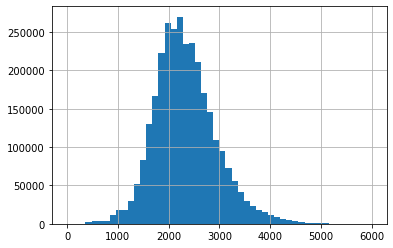

In [27]:
df['duration'].hist(bins=50,range=(0, 6000))

<AxesSubplot:>

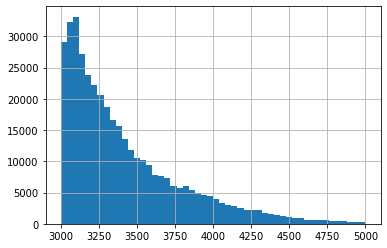

In [26]:
df['duration'].hist(bins=50,range=(3000, 5000))

<AxesSubplot:>

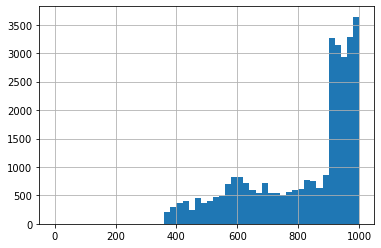

In [28]:
df['duration'].hist(bins=50,range=(0, 1000))

Уберем из датасета явные выбросы

In [34]:
df = df[df['duration']<4000]
df = df[df['duration']>900]
df

,index,match_id,match_seq_num,radiant_win,start_time,duration,avg_mmr,num_mmr,lobby_type,game_mode,avg_rank_tier,num_rank_tier,cluster,radiant_team,dire_team
2,2,5578724813,4683003326,True,1598044669,1240,2632.0,2.0,7,22,42,5,185,"5,90,22,10,56","36,18,86,112,23"
4,4,5578722900,4683003214,True,1598044529,1355,1805.0,1.0,7,22,24,3,131,"35,84,67,88,42","14,95,28,45,93"
5,5,5578722417,4683000089,True,1598044494,1168,NaN,NaN,0,22,72,2,136,"14,65,3,77,74","5,28,75,53,6"
6,6,5578721908,4683003112,False,1598044469,1425,4089.0,3.0,7,22,56,6,251,"26,41,108,22,106","17,29,85,30,54"
7,7,5578721801,4683001428,False,1598044460,1311,1549.0,1.0,7,22,24,2,202,"50,9,32,2,46","44,84,94,68,48"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3033235,1386848,5273470306,4425157261,True,1583268409,2281,3115.0,4.0,7,22,53,6,122,"14,41,26,63,17","31,86,53,4,108"
3033236,1386849,5273470304,4425164500,True,1583268416,2875,NaN,NaN,7,22,33,7,225,"88,7,111,46,8","89,84,9,29,34"
3033237,1386850,5273470300,4425161098,False,1583268421,2598,3144.0,1.0,7,22,38,4,187,"114,81,121,61,71","120,5,107,8,76"
3033238,1386851,5273470214,4425156761,False,1583268415,2297,NaN,NaN,7,22,27,7,187,"75,54,64,114,121","87,44,50,99,101"


<AxesSubplot:>

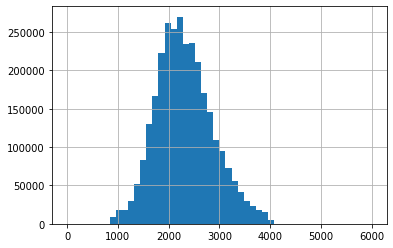

In [35]:
df['duration'].hist(bins=50,range=(0, 6000))

Найдем и удалим матчи с неадекватным числом героев в команде

In [37]:
arr_len = [len(pick.split(',')) for pick in df.radiant_team]
df['len_radiant'] = arr_len

In [38]:
df['len_radiant'].value_counts()

5    2980301
Name: len_radiant, dtype: int64

In [40]:
arr_len = [len(pick.split(',')) for pick in df.dire_team]
df['len_dire'] = arr_len

In [41]:
df['len_dire'].value_counts()

5    2980300
4          1
Name: len_dire, dtype: int64

In [42]:
df[df['len_dire'] == 4]

,index,match_id,match_seq_num,radiant_win,start_time,duration,avg_mmr,num_mmr,lobby_type,game_mode,avg_rank_tier,num_rank_tier,cluster,radiant_team,dire_team,len_radiant,len_dire
2547659,901267,5326071501,4467315276,True,1585676182,1012,5083.0,4.0,7,22,74,6,134,"108,62,32,50,12","2,26,71,76",5,4


In [43]:
df.drop([2547659], inplace=True)
df

,index,match_id,match_seq_num,radiant_win,start_time,duration,avg_mmr,num_mmr,lobby_type,game_mode,avg_rank_tier,num_rank_tier,cluster,radiant_team,dire_team,len_radiant,len_dire
2,2,5578724813,4683003326,True,1598044669,1240,2632.0,2.0,7,22,42,5,185,"5,90,22,10,56","36,18,86,112,23",5,5
4,4,5578722900,4683003214,True,1598044529,1355,1805.0,1.0,7,22,24,3,131,"35,84,67,88,42","14,95,28,45,93",5,5
5,5,5578722417,4683000089,True,1598044494,1168,NaN,NaN,0,22,72,2,136,"14,65,3,77,74","5,28,75,53,6",5,5
6,6,5578721908,4683003112,False,1598044469,1425,4089.0,3.0,7,22,56,6,251,"26,41,108,22,106","17,29,85,30,54",5,5
7,7,5578721801,4683001428,False,1598044460,1311,1549.0,1.0,7,22,24,2,202,"50,9,32,2,46","44,84,94,68,48",5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3033235,1386848,5273470306,4425157261,True,1583268409,2281,3115.0,4.0,7,22,53,6,122,"14,41,26,63,17","31,86,53,4,108",5,5
3033236,1386849,5273470304,4425164500,True,1583268416,2875,NaN,NaN,7,22,33,7,225,"88,7,111,46,8","89,84,9,29,34",5,5
3033237,1386850,5273470300,4425161098,False,1583268421,2598,3144.0,1.0,7,22,38,4,187,"114,81,121,61,71","120,5,107,8,76",5,5
3033238,1386851,5273470214,4425156761,False,1583268415,2297,NaN,NaN,7,22,27,7,187,"75,54,64,114,121","87,44,50,99,101",5,5


Создадим для каждого игрока в матче признак, который будет содержать ID выбранного им героя

In [45]:
radiant = ['radiant_%s' % i for i in range(1, 6)]
dire = ['dire_%s' % i for i in range(1, 6)]

In [46]:
for ind, value in enumerate(radiant):
    print(ind, value)
    arr = [pick.split(',')[ind] for pick in df.radiant_team]
    df[value] = arr

0 radiant_1
1 radiant_2
2 radiant_3
3 radiant_4
4 radiant_5


In [47]:
for ind, value in enumerate(dire):
    print(ind, value)
    arr = [pick.split(',')[ind] for pick in df.dire_team]
    df[value] = arr

0 dire_1
1 dire_2
2 dire_3
3 dire_4
4 dire_5


In [48]:
df

,index,match_id,match_seq_num,radiant_win,start_time,duration,avg_mmr,num_mmr,lobby_type,game_mode,...,radiant_1,radiant_2,radiant_3,radiant_4,radiant_5,dire_1,dire_2,dire_3,dire_4,dire_5
2,2,5578724813,4683003326,True,1598044669,1240,2632.0,2.0,7,22,...,5,90,22,10,56,36,18,86,112,23
4,4,5578722900,4683003214,True,1598044529,1355,1805.0,1.0,7,22,...,35,84,67,88,42,14,95,28,45,93
5,5,5578722417,4683000089,True,1598044494,1168,NaN,NaN,0,22,...,14,65,3,77,74,5,28,75,53,6
6,6,5578721908,4683003112,False,1598044469,1425,4089.0,3.0,7,22,...,26,41,108,22,106,17,29,85,30,54
7,7,5578721801,4683001428,False,1598044460,1311,1549.0,1.0,7,22,...,50,9,32,2,46,44,84,94,68,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3033235,1386848,5273470306,4425157261,True,1583268409,2281,3115.0,4.0,7,22,...,14,41,26,63,17,31,86,53,4,108
3033236,1386849,5273470304,4425164500,True,1583268416,2875,NaN,NaN,7,22,...,88,7,111,46,8,89,84,9,29,34
3033237,1386850,5273470300,4425161098,False,1583268421,2598,3144.0,1.0,7,22,...,114,81,121,61,71,120,5,107,8,76
3033238,1386851,5273470214,4425156761,False,1583268415,2297,NaN,NaN,7,22,...,75,54,64,114,121,87,44,50,99,101


In [49]:
df.drop(['index', 'match_seq_num', 'radiant_win', 'radiant_team', 'dire_team'], axis=1, inplace=True)

In [50]:
df

,match_id,start_time,duration,avg_mmr,num_mmr,lobby_type,game_mode,avg_rank_tier,num_rank_tier,cluster,...,radiant_1,radiant_2,radiant_3,radiant_4,radiant_5,dire_1,dire_2,dire_3,dire_4,dire_5
2,5578724813,1598044669,1240,2632.0,2.0,7,22,42,5,185,...,5,90,22,10,56,36,18,86,112,23
4,5578722900,1598044529,1355,1805.0,1.0,7,22,24,3,131,...,35,84,67,88,42,14,95,28,45,93
5,5578722417,1598044494,1168,NaN,NaN,0,22,72,2,136,...,14,65,3,77,74,5,28,75,53,6
6,5578721908,1598044469,1425,4089.0,3.0,7,22,56,6,251,...,26,41,108,22,106,17,29,85,30,54
7,5578721801,1598044460,1311,1549.0,1.0,7,22,24,2,202,...,50,9,32,2,46,44,84,94,68,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3033235,5273470306,1583268409,2281,3115.0,4.0,7,22,53,6,122,...,14,41,26,63,17,31,86,53,4,108
3033236,5273470304,1583268416,2875,NaN,NaN,7,22,33,7,225,...,88,7,111,46,8,89,84,9,29,34
3033237,5273470300,1583268421,2598,3144.0,1.0,7,22,38,4,187,...,114,81,121,61,71,120,5,107,8,76
3033238,5273470214,1583268415,2297,NaN,NaN,7,22,27,7,187,...,75,54,64,114,121,87,44,50,99,101


In [51]:
df[radiant] = df[radiant].apply(pd.to_numeric)

In [52]:
df[dire] = df[dire].apply(pd.to_numeric)

In [54]:
df.drop(['len_radiant', 'len_dire'], axis=1, inplace=True)

Создадим корреляционную матрицу

In [55]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,match_id,start_time,duration,avg_mmr,num_mmr,lobby_type,game_mode,avg_rank_tier,num_rank_tier,cluster,radiant_1,radiant_2,radiant_3,radiant_4,radiant_5,dire_1,dire_2,dire_3,dire_4,dire_5
match_id,1,0.999096,0.0379935,0.0186237,-0.0231904,-0.0960442,0.00345439,-0.0154207,0.00516819,0.0565658,-0.0150264,-0.0145316,-0.0143235,-0.0144599,-0.0132503,-0.012978,-0.0144644,-0.0138642,-0.0136273,-0.0144555
start_time,0.999096,1,0.0348206,0.0188334,-0.0228709,-0.0953316,0.00368805,-0.0146482,0.005692,0.0571981,-0.0152716,-0.014762,-0.0145487,-0.0146436,-0.013477,-0.0132035,-0.0146442,-0.0140848,-0.0138249,-0.014662
duration,0.0379935,0.0348206,1,-0.0893554,-0.0447879,0.0166588,0.035723,-0.133138,-0.0482565,-0.0427611,-0.0160895,-0.0145457,-0.0163683,-0.0148562,-0.0151714,-0.0186568,-0.0176043,-0.0179802,-0.0185867,-0.0180905
avg_mmr,0.0186237,0.0188334,-0.0893554,1,0.388119,0.00399897,-0.0413306,0.765994,0.302792,-0.0579597,0.0299553,0.0304359,0.0305582,0.0300915,0.0304171,0.0313078,0.0313942,0.0309308,0.0322377,0.0310463
num_mmr,-0.0231904,-0.0228709,-0.0447879,0.388119,1,0.0714748,-0.107145,0.494397,0.573817,0.0238921,0.0207839,0.0209142,0.0196914,0.0195873,0.0201713,0.0209116,0.0206563,0.0214372,0.0216474,0.0205974
lobby_type,-0.0960442,-0.0953316,0.0166588,0.00399897,0.0714748,1,0.288573,0.0526794,0.174399,-0.00235664,-0.00575427,-0.00422904,-0.00610256,-0.00761261,-0.00551278,-0.00553501,-0.0066079,-0.00644571,-0.00845817,-0.00653855
game_mode,0.00345439,0.00368805,0.035723,-0.0413306,-0.107145,0.288573,1,-0.0284769,-0.153707,-0.267618,-0.00813187,-0.00795644,-0.00859687,-0.00922397,-0.00794287,-0.00887254,-0.00847456,-0.0087565,-0.00925747,-0.00872408
avg_rank_tier,-0.0154207,-0.0146482,-0.133138,0.765994,0.494397,0.0526794,-0.0284769,1,0.467507,-0.048049,0.0429642,0.0431172,0.0436948,0.0425721,0.0434312,0.0431486,0.0435891,0.0430355,0.0440967,0.0436974
num_rank_tier,0.00516819,0.005692,-0.0482565,0.302792,0.573817,0.174399,-0.153707,0.467507,1,0.0756639,0.021608,0.0214088,0.0212634,0.0198536,0.0219308,0.0215981,0.0205744,0.021081,0.0208801,0.0211171
cluster,0.0565658,0.0571981,-0.0427611,-0.0579597,0.0238921,-0.00235664,-0.267618,-0.048049,0.0756639,1,2.74867e-06,-0.000262983,-0.000246547,-3.46888e-05,-0.000221372,-4.31702e-05,4.59369e-05,0.000595849,0.000188567,0.00116936


Проверим количество уникальных героев для игроков на первом слоте сил света

In [56]:
len(df['radiant_1'].unique())

120

В доте на момент написания кода 119 героев, что-то здесь не так)

In [57]:
df['radiant_1'].value_counts()

14     84272
26     67674
8      65493
84     64764
35     55160
       ...  
103     6099
78      5635
92      3332
66      2978
0         11
Name: radiant_1, Length: 120, dtype: int64

In [58]:
df[df['radiant_1']==0]

,match_id,start_time,duration,avg_mmr,num_mmr,lobby_type,game_mode,avg_rank_tier,num_rank_tier,cluster,radiant_1,radiant_2,radiant_3,radiant_4,radiant_5,dire_1,dire_2,dire_3,dire_4,dire_5
709650,5330088400,1585849478,2765,2999.0,1.0,7,22,42,3,251,0,1,86,30,120,22,44,72,126,2
1277227,5527314417,1595311277,2151,NaN,NaN,7,22,35,2,155,0,41,10,26,23,95,22,101,74,14
1669341,5421478802,1589742020,1971,NaN,NaN,7,22,25,2,191,0,39,49,79,74,35,2,29,67,105
2118496,5372660217,1587578758,1525,1107.0,1.0,7,22,49,7,182,0,58,50,12,120,21,75,86,36,37
2118512,5372660010,1587578742,2356,2441.0,2.0,7,22,41,6,181,0,14,79,111,4,2,93,12,53,56
2134853,5370880518,1587498020,3509,3085.0,3.0,0,22,45,5,187,0,63,5,14,32,46,103,91,9,4
2510874,5330088400,1585849478,2765,2999.0,1.0,7,22,42,3,251,0,1,86,30,120,22,44,72,126,2
2803941,5298400017,1584478214,1259,1901.0,2.0,7,22,40,5,182,0,70,128,68,102,37,11,40,106,104
2804724,5298320714,1584474373,2069,1575.0,1.0,7,22,34,2,251,0,100,26,99,25,8,50,74,14,30
2804844,5298309902,1584473901,2888,2841.0,1.0,7,22,41,2,251,0,96,5,17,40,105,106,27,21,70


Пробив данные матчи по dotabuff выяснилось, что ID равный 0 присваивался игроку, покинувшему матч не выбрав героя.
От таких матчей нужно избавиться.

In [59]:
ind_on_drop = []
for i in ['radiant', 'dire']:
    for j in range(1, 6):
        feat = i + '_' +str(j)
        for k in list(df[df[feat] == 0].index):
            ind_on_drop.append(int(k))

In [60]:
df.drop(ind_on_drop, axis=0, inplace=True)

In [61]:
df

,match_id,start_time,duration,avg_mmr,num_mmr,lobby_type,game_mode,avg_rank_tier,num_rank_tier,cluster,radiant_1,radiant_2,radiant_3,radiant_4,radiant_5,dire_1,dire_2,dire_3,dire_4,dire_5
2,5578724813,1598044669,1240,2632.0,2.0,7,22,42,5,185,5,90,22,10,56,36,18,86,112,23
4,5578722900,1598044529,1355,1805.0,1.0,7,22,24,3,131,35,84,67,88,42,14,95,28,45,93
5,5578722417,1598044494,1168,NaN,NaN,0,22,72,2,136,14,65,3,77,74,5,28,75,53,6
6,5578721908,1598044469,1425,4089.0,3.0,7,22,56,6,251,26,41,108,22,106,17,29,85,30,54
7,5578721801,1598044460,1311,1549.0,1.0,7,22,24,2,202,50,9,32,2,46,44,84,94,68,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3033235,5273470306,1583268409,2281,3115.0,4.0,7,22,53,6,122,14,41,26,63,17,31,86,53,4,108
3033236,5273470304,1583268416,2875,NaN,NaN,7,22,33,7,225,88,7,111,46,8,89,84,9,29,34
3033237,5273470300,1583268421,2598,3144.0,1.0,7,22,38,4,187,114,81,121,61,71,120,5,107,8,76
3033238,5273470214,1583268415,2297,NaN,NaN,7,22,27,7,187,75,54,64,114,121,87,44,50,99,101


Теперь необходимо закодировать категориальные признаки, содержащие информацию о выбранных героях. Сделаем это с помощью мешка слов. 

In [62]:
X_pick = np.zeros((df.shape[0], 129))

In [63]:
%%time
for i, match_id in enumerate(df.index):
    for p in range(5):
        X_pick[i, df.ix[match_id, 'radiant_%d' % (p+1)]-1] = 1
        X_pick[i, df.ix[match_id, 'dire_%d' % (p+1)]-1] = -1

C:\Users\kostik\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kostik\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


Wall time: 10min 50s


In [64]:
heroes = pd.DataFrame(data=X_pick)
heroes

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2980245,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2980246,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2980247,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,...,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2980248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
heroes.to_csv('heroes')

Удалим уже не нужные нам столбцы

In [66]:
dropped = radiant + dire
df.drop(dropped, axis=1, inplace=True)

In [67]:
df = df.reset_index()

In [68]:
df.drop(['index'], axis=1, inplace=True)

In [69]:
df

,match_id,start_time,duration,avg_mmr,num_mmr,lobby_type,game_mode,avg_rank_tier,num_rank_tier,cluster
0,5578724813,1598044669,1240,2632.0,2.0,7,22,42,5,185
1,5578722900,1598044529,1355,1805.0,1.0,7,22,24,3,131
2,5578722417,1598044494,1168,NaN,NaN,0,22,72,2,136
3,5578721908,1598044469,1425,4089.0,3.0,7,22,56,6,251
4,5578721801,1598044460,1311,1549.0,1.0,7,22,24,2,202
...,...,...,...,...,...,...,...,...,...,...
2980245,5273470306,1583268409,2281,3115.0,4.0,7,22,53,6,122
2980246,5273470304,1583268416,2875,NaN,NaN,7,22,33,7,225
2980247,5273470300,1583268421,2598,3144.0,1.0,7,22,38,4,187
2980248,5273470214,1583268415,2297,NaN,NaN,7,22,27,7,187


Создадим 2 новых признака: день недели и дату

In [70]:
def day_in_week(t):
    return ((t % 604800) // 86400 + 3)%7+1
from datetime import datetime
def unix_to_date(t):
    return datetime.utcfromtimestamp(t).strftime('%Y-%m-%d')

In [71]:
df['day_in_week'] = df['start_time'].apply(day_in_week)

In [72]:
df['date'] = df['start_time'].apply(unix_to_date)

In [73]:
df['day_in_week'].value_counts()

5    793210
6    417462
7    393060
3    353407
1    351859
4    341168
2    330084
Name: day_in_week, dtype: int64

In [74]:
df

,match_id,start_time,duration,avg_mmr,num_mmr,lobby_type,game_mode,avg_rank_tier,num_rank_tier,cluster,day_in_week,date
0,5578724813,1598044669,1240,2632.0,2.0,7,22,42,5,185,5,2020-08-21
1,5578722900,1598044529,1355,1805.0,1.0,7,22,24,3,131,5,2020-08-21
2,5578722417,1598044494,1168,NaN,NaN,0,22,72,2,136,5,2020-08-21
3,5578721908,1598044469,1425,4089.0,3.0,7,22,56,6,251,5,2020-08-21
4,5578721801,1598044460,1311,1549.0,1.0,7,22,24,2,202,5,2020-08-21
...,...,...,...,...,...,...,...,...,...,...,...,...
2980245,5273470306,1583268409,2281,3115.0,4.0,7,22,53,6,122,2,2020-03-03
2980246,5273470304,1583268416,2875,NaN,NaN,7,22,33,7,225,2,2020-03-03
2980247,5273470300,1583268421,2598,3144.0,1.0,7,22,38,4,187,2,2020-03-03
2980248,5273470214,1583268415,2297,NaN,NaN,7,22,27,7,187,2,2020-03-03


In [45]:
%%time
new_df = pd.concat([df, heroes], axis=1)
new_df

Wall time: 34min 40s


,match_id,start_time,duration,avg_mmr,num_mmr,lobby_type,game_mode,avg_rank_tier,num_rank_tier,cluster,...,119,120,121,122,123,124,125,126,127,128
0,5578709011,1598043607,564,1802.0,1.0,7,22,36,3,183,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5578725017,1598044669,581,NaN,NaN,0,22,48,4,153,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5578724813,1598044669,1240,2632.0,2.0,7,22,42,5,185,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5578723414,1598044570,775,3121.0,1.0,7,22,43,3,251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5578722900,1598044529,1355,1805.0,1.0,7,22,24,3,131,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3033179,5273470306,1583268409,2281,3115.0,4.0,7,22,53,6,122,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3033180,5273470304,1583268416,2875,NaN,NaN,7,22,33,7,225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3033181,5273470300,1583268421,2598,3144.0,1.0,7,22,38,4,187,...,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3033182,5273470214,1583268415,2297,NaN,NaN,7,22,27,7,187,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Выделим целевой признак в отдельный датафрейм

In [75]:
y = df['duration']
y

0          1240
1          1355
2          1168
3          1425
4          1311
           ... 
2980245    2281
2980246    2875
2980247    2598
2980248    2297
2980249    1962
Name: duration, Length: 2980250, dtype: int64

In [76]:
df.drop(['duration'], axis=1, inplace=True)
df

,match_id,start_time,avg_mmr,num_mmr,lobby_type,game_mode,avg_rank_tier,num_rank_tier,cluster,day_in_week,date
0,5578724813,1598044669,2632.0,2.0,7,22,42,5,185,5,2020-08-21
1,5578722900,1598044529,1805.0,1.0,7,22,24,3,131,5,2020-08-21
2,5578722417,1598044494,NaN,NaN,0,22,72,2,136,5,2020-08-21
3,5578721908,1598044469,4089.0,3.0,7,22,56,6,251,5,2020-08-21
4,5578721801,1598044460,1549.0,1.0,7,22,24,2,202,5,2020-08-21
...,...,...,...,...,...,...,...,...,...,...,...
2980245,5273470306,1583268409,3115.0,4.0,7,22,53,6,122,2,2020-03-03
2980246,5273470304,1583268416,NaN,NaN,7,22,33,7,225,2,2020-03-03
2980247,5273470300,1583268421,3144.0,1.0,7,22,38,4,187,2,2020-03-03
2980248,5273470214,1583268415,NaN,NaN,7,22,27,7,187,2,2020-03-03


Некоторые значения avg_mmr у нас пропущены. Мы используем ранее выявленную корреляцию между признаками avg_mmr и avg_rank_tier, чтобы восстановить эти значения

In [77]:
df['avg_mmr/rank_tier'] = df['avg_mmr']/df['avg_rank_tier']

<AxesSubplot:>

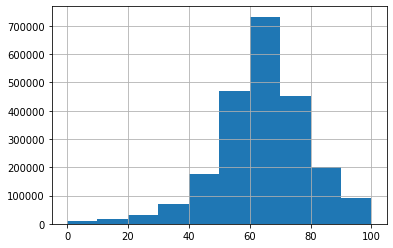

In [79]:
%matplotlib inline
df['avg_mmr/rank_tier'].hist(range = (0, 100))

In [81]:
df

,match_id,start_time,avg_mmr,num_mmr,lobby_type,game_mode,avg_rank_tier,num_rank_tier,cluster,day_in_week,date,avg_mmr/rank_tier
0,5578724813,1598044669,2632.0,2.0,7,22,42,5,185,5,2020-08-21,62.666667
1,5578722900,1598044529,1805.0,1.0,7,22,24,3,131,5,2020-08-21,75.208333
2,5578722417,1598044494,NaN,NaN,0,22,72,2,136,5,2020-08-21,NaN
3,5578721908,1598044469,4089.0,3.0,7,22,56,6,251,5,2020-08-21,73.017857
4,5578721801,1598044460,1549.0,1.0,7,22,24,2,202,5,2020-08-21,64.541667
...,...,...,...,...,...,...,...,...,...,...,...,...
2980245,5273470306,1583268409,3115.0,4.0,7,22,53,6,122,2,2020-03-03,58.773585
2980246,5273470304,1583268416,NaN,NaN,7,22,33,7,225,2,2020-03-03,NaN
2980247,5273470300,1583268421,3144.0,1.0,7,22,38,4,187,2,2020-03-03,82.736842
2980248,5273470214,1583268415,NaN,NaN,7,22,27,7,187,2,2020-03-03,NaN


In [82]:
df['num_mmr'].value_counts()

1.0     791011
2.0     631934
3.0     429610
4.0     258490
5.0     136812
6.0      60216
7.0      21696
8.0       6024
9.0       1269
10.0       189
Name: num_mmr, dtype: int64

In [83]:
df['avg_mmr'].fillna(df['avg_mmr/rank_tier'].median()*df['avg_rank_tier'], inplace=True)
df['num_mmr'].fillna(1, inplace=True)

In [84]:
df

,match_id,start_time,avg_mmr,num_mmr,lobby_type,game_mode,avg_rank_tier,num_rank_tier,cluster,day_in_week,date,avg_mmr/rank_tier
0,5578724813,1598044669,2632.000000,2.0,7,22,42,5,185,5,2020-08-21,62.666667
1,5578722900,1598044529,1805.000000,1.0,7,22,24,3,131,5,2020-08-21,75.208333
2,5578722417,1598044494,4701.473684,1.0,0,22,72,2,136,5,2020-08-21,NaN
3,5578721908,1598044469,4089.000000,3.0,7,22,56,6,251,5,2020-08-21,73.017857
4,5578721801,1598044460,1549.000000,1.0,7,22,24,2,202,5,2020-08-21,64.541667
...,...,...,...,...,...,...,...,...,...,...,...,...
2980245,5273470306,1583268409,3115.000000,4.0,7,22,53,6,122,2,2020-03-03,58.773585
2980246,5273470304,1583268416,2154.842105,1.0,7,22,33,7,225,2,2020-03-03,NaN
2980247,5273470300,1583268421,3144.000000,1.0,7,22,38,4,187,2,2020-03-03,82.736842
2980248,5273470214,1583268415,1763.052632,1.0,7,22,27,7,187,2,2020-03-03,NaN


In [85]:
df.drop(['cluster', 'avg_mmr/rank_tier'], axis=1, inplace=True)
df

,match_id,start_time,avg_mmr,num_mmr,lobby_type,game_mode,avg_rank_tier,num_rank_tier,day_in_week,date
0,5578724813,1598044669,2632.000000,2.0,7,22,42,5,5,2020-08-21
1,5578722900,1598044529,1805.000000,1.0,7,22,24,3,5,2020-08-21
2,5578722417,1598044494,4701.473684,1.0,0,22,72,2,5,2020-08-21
3,5578721908,1598044469,4089.000000,3.0,7,22,56,6,5,2020-08-21
4,5578721801,1598044460,1549.000000,1.0,7,22,24,2,5,2020-08-21
...,...,...,...,...,...,...,...,...,...,...
2980245,5273470306,1583268409,3115.000000,4.0,7,22,53,6,2,2020-03-03
2980246,5273470304,1583268416,2154.842105,1.0,7,22,33,7,2,2020-03-03
2980247,5273470300,1583268421,3144.000000,1.0,7,22,38,4,2,2020-03-03
2980248,5273470214,1583268415,1763.052632,1.0,7,22,27,7,2,2020-03-03


In [86]:
df['game_mode'].value_counts()

22    2552196
3      232890
4      180813
2        8749
5        5513
16         67
1          22
Name: game_mode, dtype: int64

Закодируем категориальные признаки тип лобби и игровой мод с помощью OneHot кодирования

In [87]:
from sklearn.preprocessing import OneHotEncoder

In [88]:
%%time
enc = OneHotEncoder(handle_unknown='ignore')
X = df[['lobby_type', 'game_mode']]
enc.fit(X)
X_new = enc.transform(X).toarray()
X_new

Wall time: 1.43 s


array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [89]:
features = enc.get_feature_names(['lobby', 'game_mode'])

In [90]:
features

array(['lobby_0', 'lobby_1', 'lobby_7', 'lobby_9', 'game_mode_1',
       'game_mode_2', 'game_mode_3', 'game_mode_4', 'game_mode_5',
       'game_mode_16', 'game_mode_22'], dtype=object)

In [91]:
lobby_game_mode = pd.DataFrame(data=X_new, columns=features)
lobby_game_mode

,lobby_0,lobby_1,lobby_7,lobby_9,game_mode_1,game_mode_2,game_mode_3,game_mode_4,game_mode_5,game_mode_16,game_mode_22
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2980245,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2980246,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2980247,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2980248,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [92]:
lobby_game_mode.to_csv('lobby_game_mode')

In [93]:
df.drop(['num_mmr', 'avg_rank_tier', 'num_rank_tier'], axis=1, inplace=True)
df

,match_id,start_time,avg_mmr,lobby_type,game_mode,day_in_week,date
0,5578724813,1598044669,2632.000000,7,22,5,2020-08-21
1,5578722900,1598044529,1805.000000,7,22,5,2020-08-21
2,5578722417,1598044494,4701.473684,0,22,5,2020-08-21
3,5578721908,1598044469,4089.000000,7,22,5,2020-08-21
4,5578721801,1598044460,1549.000000,7,22,5,2020-08-21
...,...,...,...,...,...,...,...
2980245,5273470306,1583268409,3115.000000,7,22,2,2020-03-03
2980246,5273470304,1583268416,2154.842105,7,22,2,2020-03-03
2980247,5273470300,1583268421,3144.000000,7,22,2,2020-03-03
2980248,5273470214,1583268415,1763.052632,7,22,2,2020-03-03


In [95]:
df.drop(['match_id'], axis=1, inplace=True)

In [96]:
df

,start_time,avg_mmr,lobby_type,game_mode,day_in_week,date
0,1598044669,2632.000000,7,22,5,2020-08-21
1,1598044529,1805.000000,7,22,5,2020-08-21
2,1598044494,4701.473684,0,22,5,2020-08-21
3,1598044469,4089.000000,7,22,5,2020-08-21
4,1598044460,1549.000000,7,22,5,2020-08-21
...,...,...,...,...,...,...
2980245,1583268409,3115.000000,7,22,2,2020-03-03
2980246,1583268416,2154.842105,7,22,2,2020-03-03
2980247,1583268421,3144.000000,7,22,2,2020-03-03
2980248,1583268415,1763.052632,7,22,2,2020-03-03


Создадим 4 признака, которые будут обозначать время суток, в которое начался матч

In [97]:
def is_morning(t):
    if 21600 < t% 86400 <= 43200:
        return 1
    else:
        return 0
def is_day(t):
    if 43200 < t% 86400 <= 64800:
        return 1
    else:
        return 0
def is_evening(t):
    if 64800 < t% 86400 < 86400:
        return 1
    else:
        return 0
def is_night(t):
    if 0 <= t% 86400 <= 21600:
        return 1
    else:
        return 0

In [98]:
df['is_morning'] = df['start_time'].apply(is_morning)
df['is_day'] = df['start_time'].apply(is_day)
df['is_evening'] = df['start_time'].apply(is_evening)
df['is_night'] = df['start_time'].apply(is_night)

In [99]:
Times_of_Day = pd.DataFrame(data=df[['is_morning', 'is_day', 'is_evening', 'is_night']])

In [100]:
Times_of_Day

,is_morning,is_day,is_evening,is_night
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
2980245,0,0,1,0
2980246,0,0,1,0
2980247,0,0,1,0
2980248,0,0,1,0


In [101]:
Times_of_Day.to_csv('Times_of_Day')

In [102]:
df.drop(['is_morning', 'is_day', 'is_evening', 'is_night'], axis=1, inplace=True)


Создадим из оставшихся в исходном датафрейме признаков csv файл. Целевой признак также сохраним в отдельный файл

In [103]:
df.drop(['date'], axis=1, inplace=True)
df

,start_time,avg_mmr,lobby_type,game_mode,day_in_week
0,1598044669,2632.000000,7,22,5
1,1598044529,1805.000000,7,22,5
2,1598044494,4701.473684,0,22,5
3,1598044469,4089.000000,7,22,5
4,1598044460,1549.000000,7,22,5
...,...,...,...,...,...
2980245,1583268409,3115.000000,7,22,2
2980246,1583268416,2154.842105,7,22,2
2980247,1583268421,3144.000000,7,22,2
2980248,1583268415,1763.052632,7,22,2


In [104]:
df.to_csv('first_df')

In [105]:
y.to_csv('ВРЕМЯ МАТЧА')

C:\Users\kostik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


Обучать же модель я буду через kaggle notebook